<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/hpdp/ATG/Assignment_5_Automated_Feature_Engineering_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 - Automated Feature Engineering Tools
## Tools selected:
* **Featuretools**
* **AutoFeat**

<br>

## Group Name: ATONG (ATG)

### Group Members:
| Name                                      | Matrix Number   |
| :---------------------------------------- | :-------------: |
| SAM CHIA YUN                              |A21EC0127        |
| ALIYA ZARENA BINTI ZAINULANUAR            |A21EC0013        |
| MUHAMMAD IQMAL BIN SIS                    |A21EC0080        |
| ANG YI QIN                                |A21EC0163        |

<br>

Date of submission: 26 Nov 2023

## Step 1 - Dataset Selection
### Overview
Kaggle Website Link: [*Kaggle*](https://www.kaggle.com/)
<br><br>
The first step in this data analysis or machine learning project is to select a suitable dataset. The dataset serves as the foundation for the analysis, and choosing an appropriate one is crucial for the success of the project.
<br><br>
### Dataset Information
**Name**: **Airline Delay and Cancellation Data, 2018** <br>
**URL**: [*Dataset Link*](https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?select=2018.csv) <br>
**Description**: The "Airline Delay and Cancellation Data (2009-2018)" on Kaggle offers a comprehensive overview of airline performance during the specified decade. It includes features such as flight information, departure and arrival delays, cancellation details, and reasons for disruptions across multiple carriers. Analysts and data scientists can utilize this dataset to explore trends, predict flight delays, and assess the punctuality of different airlines.

##Step 2 - Loading the Dataset


The code !pip install opendatasets installs the opendatasets Python package, which facilitates the easy downloading and handling of datasets from the internet for machine learning and data analysis projects.

In [ ]:
!pip install opendatasets

The code below will use the opendatasets library, downloads the "Airline Delay and Cancellation Data (2009-2018)" dataset from Kaggle, making it available for analysis and machine learning projects in a Python environment.

In [ ]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?select=2018.csv")

Skipping, found downloaded files in "./airline-delay-and-cancellation-data-2009-2018" (use force=True to force download)


Importing essential libraries for data analysis and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


The pd.read_csv() function loads the data into a DataFrame called 'df.'

The head() method is then used to display the first few rows of the DataFrame, providing a quick overview of the dataset's structure and content.

In [ ]:
# reading the csv file
file =('airline-delay-and-cancellation-data-2009-2018/2018.csv')
df = pd.read_csv(file)

# displaying the contents of the XLSX file
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In order to check the total number of rows and columns, we can use df.shape

In [ ]:
df.shape

(7213446, 28)

##Step 3 - Exploratory Data Analysis (EDA)

Exploring the first few rows of the data.

In [ ]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


With the code below, we conduct a fundamental exploratory data analysis to comprehend the inherent features of the dataset. This involves identifying missing values, inspecting data types, and obtaining a comprehensive overview of the dataset's structure and summary statistics.

In [ ]:
# Check for missing values
print(df.isnull().sum())

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64



Due to a substantial number of null values, we will be eliminating the following columns: 'CANCELLATION_CODE,' 'CARRIER_DELAY,' 'WEATHER_DELAY,' 'NAS_DELAY,' 'SECURITY_DELAY,' 'LATE_AIRCRAFT_DELAY,' and 'Unnamed: 27.'

In [ ]:
# List of columns to drop
columns_to_drop = ['DIVERTED','CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 27']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
#Recheck the number of rows and columns again
df.shape

(7213446, 20)

In [ ]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,268.0,250.0,225.0,1605.0
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,99.0,83.0,65.0,414.0
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,134.0,126.0,106.0,846.0
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,190.0,182.0,157.0,1120.0
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,112.0,106.0,83.0,723.0


To identify missing values in a Pandas DataFrame, the isnull() method can be employed, producing a DataFrame with the same shape as the original, where True indicates missing data and False denotes existing values. Subsequently, utilizing the sum() function allows counting the missing values in each column.

In [ ]:
# Check for missing values
print(df.isnull().sum())

FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME               112317
DEP_DELAY              117234
TAXI_OUT               115830
WHEELS_OFF             115829
WHEELS_ON              119246
TAXI_IN                119246
CRS_ARR_TIME                0
ARR_TIME               119245
ARR_DELAY              137040
CANCELLED                   0
CRS_ELAPSED_TIME           10
ACTUAL_ELAPSED_TIME    134442
AIR_TIME               134442
DISTANCE                    0
dtype: int64


To drop rows with null values from the DataFrame, we can use the dropna() method.

In [ ]:
df.dropna(inplace=True)


To assess the effectiveness of the data cleaning process, we can once again utilize the following code.

In [ ]:
# Check for missing values
print(df.isnull().sum())

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64


In [ ]:
df.shape

(7071817, 20)

In [ ]:
# Get data types and basic statistics
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7071817 entries, 0 to 7213445
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CRS_ELAPSED_TIME     float64
 17  ACTUAL_ELAPSED_TIME  float64
 18  AIR_TIME             float64
 19  DISTANCE             float64
dtypes: float64(13), int64(3), object(4)
memory usage: 1.1+ GB
None


The describe() function can be employed to extract essential statistical details regarding the numerical columns in the dataset. This encompasses metrics such as the mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.

In [ ]:
print(df.describe())

       OP_CARRIER_FL_NUM  CRS_DEP_TIME      DEP_TIME     DEP_DELAY  \
count       7.071817e+06  7.071817e+06  7.071817e+06  7.071817e+06   
mean        2.596264e+03  1.328552e+03  1.333715e+03  9.902050e+00   
std         1.858259e+03  4.908422e+02  5.045693e+02  4.464612e+01   
min         1.000000e+00  1.000000e+00  1.000000e+00 -1.220000e+02   
25%         1.018000e+03  9.140000e+02  9.160000e+02 -5.000000e+00   
50%         2.119000e+03  1.320000e+03  1.326000e+03 -2.000000e+00   
75%         4.060000e+03  1.735000e+03  1.744000e+03  7.000000e+00   
max         7.909000e+03  2.359000e+03  2.400000e+03  2.710000e+03   

           TAXI_OUT    WHEELS_OFF     WHEELS_ON       TAXI_IN  CRS_ARR_TIME  \
count  7.071817e+06  7.071817e+06  7.071817e+06  7.071817e+06  7.071817e+06   
mean   1.739675e+01  1.357723e+03  1.462093e+03  7.595056e+00  1.485222e+03   
std    9.904040e+00  5.060399e+02  5.332033e+02  6.041841e+00  5.181999e+02   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.00

Calculating the correlation matrix for a DataFrame (df) using the corr() method in pandas. The resulting matrix represents the pairwise correlation coefficients between numerical columns in the DataFrame. Subsequently, the matrix is printed to provide insights into the strength and direction of relationships between variables.

In [ ]:
# Calculate and visualize correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)


<ipython-input-17-e95fed11acfd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                     OP_CARRIER_FL_NUM  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  \
OP_CARRIER_FL_NUM             1.000000      0.007482  0.013422   0.009448   
CRS_DEP_TIME                  0.007482      1.000000  0.960311   0.104968   
DEP_TIME                      0.013422      0.960311  1.000000   0.139866   
DEP_DELAY                     0.009448      0.104968  0.139866   1.000000   
TAXI_OUT                      0.067424      0.001208  0.010446   0.056181   
WHEELS_OFF                    0.021491      0.934421  0.971443   0.130016   
WHEELS_ON                     0.016669      0.638205  0.661590   0.038373   
TAXI_IN                      -0.016509     -0.048556 -0.044276   0.009451   
CRS_ARR_TIME                  0.014850      0.687537  0.689139   0.090476   
ARR_TIME                      0.020243      0.610429  0.632954   0.030778   
ARR_DELAY                     0.019213      0.095295  0.130680   0.957282   
CANCELLED                          NaN           NaN       NaN        NaN   

##Step 4 - Feature Engineering with Automated Tools

I have selected two feature engineering automation tools, Featuretools and AutoFeat, both renowned for their efficiency and user-friendly interfaces. In the upcoming step, I will be utilizing each of these tools separately to enhance the feature engineering process for my analysis. These tools are expected to streamline and automate the creation of new features, contributing to a more effective and comprehensive exploration of the dataset.

###Automated Tool 1 - Featuretools

* Featuretools is an open-source Python library designed for automated feature engineering.
* It provides a high-level abstraction to define and create features, making it relatively easy to use.
* Featuretools excels in handling relational datasets and can automatically generate features based on temporal and categorical relationships.

i. Installing the latest version of 'featuretools' library into the Python environment, which will be used for automated feature engineering.

In [ ]:
!pip install -U featuretools


ii. Setting up the environment for using the featuretools library while avoiding the display of warning messages from pandas.

In [ ]:
import featuretools as ft

# ignore warnings from pandas
import warnings
warnings.filterwarnings('ignore')


iii. Creating an empty EntitySet with the identifier 'flights', and we can then add tables (entities) to this EntitySet and define relationships between them for feature engineering purposes.

In [ ]:
es = ft.EntitySet(id = 'flights')

iv. Creating a new DataFrame (op_carrier) containing unique values from the "OP_CARRIER" column of the original DataFrame (df). The new DataFrame has a single column named "op_carrier."

In [ ]:
op_carrier = pd.DataFrame(df.OP_CARRIER.unique(), columns = ["op_carrier"])

v. Creating an entity from the df dataframe. The 'op_carrier' column in the DataFrame is designated as the index or unique identifier.

In [ ]:
# Create an entity from the dataframe.
es = es.add_dataframe(        dataframe = df,
                              dataframe_name = 'flights',
                              index = 'op_carrier',
                              )

vi. Adding another DataFrame named 'op_carrier' to the existing EntitySet (es) that we had already created above.

In [ ]:
es = es.add_dataframe(
                         dataframe = op_carrier,
                         dataframe_name = "op_carrier"
)

vii. Establishing a relationship between the "op_carrier" entity and the "flights" entity in the EntitySet. The relationship is based on the "OP_CARRIER" variable in the "flights" entity and the "op_carrier" entity.

In [ ]:
es.add_relationship("op_carrier", "op_carrier", "flights", "OP_CARRIER")

Entityset: flights
  DataFrames:
    flights [Rows: 7071817, Columns: 21]
    op_carrier [Rows: 18, Columns: 1]
  Relationships:
    flights.OP_CARRIER -> op_carrier.op_carrier

viii. Performing the "Deep Feature Synthesis" function from the "featuretools" library to achieve feature engineering on the entity set that we had created.  The generated features are stored in the features DataFrame, and their names are stored in the feature_names variable.

In [ ]:
# Perform deep feature synthesis without specifying primitives
features, feature_names = ft.dfs(entityset=es, target_dataframe_name='op_carrier',  max_depth = 1)

ix. Exploring the first few rows of the data to have a view on the new features that are created.

In [ ]:
features.head()

,COUNT(flights),MAX(flights.ACTUAL_ELAPSED_TIME),MAX(flights.AIR_TIME),MAX(flights.ARR_DELAY),MAX(flights.ARR_TIME),MAX(flights.CANCELLED),MAX(flights.CRS_ARR_TIME),MAX(flights.CRS_DEP_TIME),MAX(flights.CRS_ELAPSED_TIME),MAX(flights.DEP_DELAY),...,SUM(flights.CRS_DEP_TIME),SUM(flights.CRS_ELAPSED_TIME),SUM(flights.DEP_DELAY),SUM(flights.DEP_TIME),SUM(flights.DISTANCE),SUM(flights.OP_CARRIER_FL_NUM),SUM(flights.TAXI_IN),SUM(flights.TAXI_OUT),SUM(flights.WHEELS_OFF),SUM(flights.WHEELS_ON)
op_carrier,,,,,,,,,,,,,,,,,,,,,
UA,614915,757.0,682.0,1429.0,2359.0,0.0,2359.0,2359.0,683.0,1431.0,...,812996278.0,114441027.0,6134104.0,813539302.0,728082534.0,757180769.0,4760636.0,11974875.0,826571377.0,894839417.0
AS,242979,537.0,438.0,842.0,2400.0,0.0,2359.0,2359.0,432.0,839.0,...,323542094.0,48754669.0,589980.0,322266394.0,317737205.0,166776237.0,1921577.0,4525223.0,326917897.0,356226417.0
9E,231815,416.0,252.0,1685.0,2400.0,0.0,2359.0,2355.0,278.0,1659.0,...,305335408.0,25427050.0,2492404.0,307104852.0,110143213.0,996772739.0,1698167.0,5108971.0,315313503.0,339885545.0
B6,297758,541.0,447.0,1473.0,2400.0,0.0,2400.0,2359.0,421.0,1489.0,...,406298118.0,52113475.0,4693897.0,403350895.0,319151438.0,297361257.0,2149815.0,5381765.0,406089660.0,417468421.0
EV,196583,310.0,234.0,1649.0,2400.0,0.0,2359.0,2355.0,284.0,1632.0,...,259565832.0,20727117.0,2408534.0,261383286.0,92787311.0,833419950.0,1556681.0,3808556.0,267563482.0,288010836.0


x. Exploring the columns that had been created by the "featuretools".

In [ ]:
features.columns

Index(['COUNT(flights)', 'MAX(flights.ACTUAL_ELAPSED_TIME)',
       'MAX(flights.AIR_TIME)', 'MAX(flights.ARR_DELAY)',
       'MAX(flights.ARR_TIME)', 'MAX(flights.CANCELLED)',
       'MAX(flights.CRS_ARR_TIME)', 'MAX(flights.CRS_DEP_TIME)',
       'MAX(flights.CRS_ELAPSED_TIME)', 'MAX(flights.DEP_DELAY)',
       ...
       'SUM(flights.CRS_DEP_TIME)', 'SUM(flights.CRS_ELAPSED_TIME)',
       'SUM(flights.DEP_DELAY)', 'SUM(flights.DEP_TIME)',
       'SUM(flights.DISTANCE)', 'SUM(flights.OP_CARRIER_FL_NUM)',
       'SUM(flights.TAXI_IN)', 'SUM(flights.TAXI_OUT)',
       'SUM(flights.WHEELS_OFF)', 'SUM(flights.WHEELS_ON)'],
      dtype='object', length=101)

### Automated Tool 2 - AutoFeat

* AutoFeat is an automated feature engineering tool designed to streamline the process of creating new features from existing data.
* It aims to enhance the performance of machine learning models by automatically generating relevant and informative features.
* AutoFeat may explore mathematical operations, transformations, and interactions between variables to construct new features.



i. Installing the latest version of 'autofeat' library into the Python environment, which will be used for automated feature engineering.

In [ ]:
!pip install autofeat

ii. Importing AutoFeatRegressor class from the 'autofeat' module.

In [ ]:
from autofeat import AutoFeatRegressor

iii. Providing a short setup for using the AutoFeatRegressor class from the AutoFeat library. It initializes an instance of the AutoFeatRegressor class and assigns it to the variable afreg.

The variable target_variable is set to 'ARR_TIME', indicating that the regression task involves predicting the arrival time specified by the 'ARR_TIME' column.

In [ ]:
target_variable = 'ARR_TIME'
afreg = AutoFeatRegressor()

iv. Importing neccessary library which is 'train_test_split' from sklearn.model_selection.

In [ ]:
from sklearn.model_selection import train_test_split


v. Setting up the list of selected columns ('DISTANCE' and 'ARR_DELAY') and specifies the target variable ('ARR_TIME') for the regression task.

In [ ]:
selected_columns = ['DISTANCE', 'ARR_DELAY']
target_variable = 'ARR_TIME'

vi. Creating a subset of the original DataFrame (df) containing only the selected columns and the target variable.

The sample method is then used to randomly sample 10% of the data (frac=0.1).

In [ ]:
df_train = df[selected_columns + [target_variable]].sample(frac = 0.1)

vii. Separating the features (X_train) and the target variable (y_train) from the sampled DataFrame.

In [ ]:
X_train = df_train.drop(target_variable, axis=1)
y_train = df_train[target_variable]

viii. Fits the AutoFeatRegressor (afreg) to the training features (X_train) and target variable (y_train) using the fit_transform method. This performs automated feature engineering on the features to potentially improve the model's predictive performance.

The focus is on predicting the arrival time ('ARR_TIME') based on the selected features.

In [ ]:
X_train_transformed = afreg.fit_transform(X_train, y_train)

ix. Display the results after applying automated feature engineering to the original features

In [ ]:
X_train_transformed


,DISTANCE,ARR_DELAY,1/DISTANCE,DISTANCE**4,ARR_DELAY**5,ARR_DELAY**2,ARR_DELAY**2*DISTANCE**3,ARR_DELAY**3/DISTANCE,DISTANCE*Abs(ARR_DELAY),ARR_DELAY/DISTANCE
0,362.0,-8.0,0.002762,1.717253e+10,-3.276800e+04,64.0,3.036027e+09,-1.414365,2896.0,-0.022099
1,628.0,-14.0,0.001592,1.555387e+11,-5.378240e+05,196.0,4.854394e+10,-4.369427,8792.0,-0.022293
2,438.0,-7.0,0.002283,3.680412e+10,-1.680700e+04,49.0,4.117356e+09,-0.783105,3066.0,-0.015982
3,1430.0,-9.0,0.000699,4.181616e+12,-5.904900e+04,81.0,2.368608e+11,-0.509790,12870.0,-0.006294
4,957.0,-19.0,0.001045,8.387794e+11,-2.476099e+06,361.0,3.164048e+11,-7.167189,18183.0,-0.019854
...,...,...,...,...,...,...,...,...,...,...
707177,493.0,-2.0,0.002028,5.907282e+10,-3.200000e+01,4.0,4.792926e+08,-0.016227,986.0,-0.004057
707178,440.0,-14.0,0.002273,3.748096e+10,-5.378240e+05,196.0,1.669606e+10,-6.236364,6160.0,-0.031818
707179,209.0,-5.0,0.004785,1.908030e+09,-3.125000e+03,25.0,2.282332e+08,-0.598086,1045.0,-0.023923
707180,1014.0,76.0,0.000986,1.057187e+12,2.535525e+09,5776.0,6.022004e+12,432.915187,77064.0,0.074951


##Step 5 - Feature Selection

To identify the crucial features generated by Automated Feature Engineering Tools, specifically from Featuretools and AutoFeat, we will leverage domain knowledge for the purpose of feature selection.


Before we identifying the specific features, let's start by enumerating the columns created by the tools for Automated Feature Engineering.

In [ ]:
features.columns

Index(['COUNT(flights)', 'MAX(flights.ACTUAL_ELAPSED_TIME)',
       'MAX(flights.AIR_TIME)', 'MAX(flights.ARR_DELAY)',
       'MAX(flights.ARR_TIME)', 'MAX(flights.CANCELLED)',
       'MAX(flights.CRS_ARR_TIME)', 'MAX(flights.CRS_DEP_TIME)',
       'MAX(flights.CRS_ELAPSED_TIME)', 'MAX(flights.DEP_DELAY)',
       ...
       'SUM(flights.CRS_DEP_TIME)', 'SUM(flights.CRS_ELAPSED_TIME)',
       'SUM(flights.DEP_DELAY)', 'SUM(flights.DEP_TIME)',
       'SUM(flights.DISTANCE)', 'SUM(flights.OP_CARRIER_FL_NUM)',
       'SUM(flights.TAXI_IN)', 'SUM(flights.TAXI_OUT)',
       'SUM(flights.WHEELS_OFF)', 'SUM(flights.WHEELS_ON)'],
      dtype='object', length=101)

In [ ]:
X_train_transformed.columns

Index(['DISTANCE', 'ARR_DELAY', '1/DISTANCE', 'DISTANCE**4', 'ARR_DELAY**5',
       'ARR_DELAY**2', 'ARR_DELAY**2*DISTANCE**3', 'ARR_DELAY**3/DISTANCE',
       'DISTANCE*Abs(ARR_DELAY)', 'ARR_DELAY/DISTANCE'],
      dtype='object')

### Upon examining the features analyzed by Featuretools, we have identified five crucial features that contribute significantly to our understanding and analysis of the dataset.

* COUNT(flights) feature plays a pivotal role in revealing the volume of flights attributed to each carrier helping us to understand the distribution of flights across various carriers.

* (MAX(flights.DEP_DELAY)) and (MAX(flights.ARR_DELAY)) features is essential for identifying which type of airline carrier is most prone to flight delays.

* SUM(flights.DISTANCE) feature is pivotal for assessing the extent of travel for each carrier. It provides a cumulative measure of the distance covered by flights operated by different carriers.

* MEAN(flights.AIR_TIME) feature is evaluating the efficiency of air travel for each carrier. This metric indicates the average time spent in the air for flights operated by different carriers.

In [ ]:
# Specifying the features that we want to display
selected_columns = ['COUNT(flights)', 'MAX(flights.DEP_DELAY)', 'MAX(flights.ARR_DELAY)', 'SUM(flights.DISTANCE)', 'MEAN(flights.AIR_TIME)']

# Creating a new dataframe with only the desired columns
selected_columns_df = features[selected_columns]

# Displaying the new dataframe
print(selected_columns_df)

            COUNT(flights)  MAX(flights.DEP_DELAY)  MAX(flights.ARR_DELAY)  \
op_carrier                                                                   
UA                  614915                  1431.0                  1429.0   
AS                  242979                   839.0                   842.0   
9E                  231815                  1659.0                  1685.0   
B6                  297758                  1489.0                  1473.0   
EV                  196583                  1632.0                  1649.0   
F9                  117523                  1254.0                  1253.0   
G4                   95192                  1462.0                  1505.0   
HA                   83375                  2482.0                  2475.0   
MQ                  284497                  1291.0                  1301.0   
NK                  174129                  1527.0                  1527.0   
OH                  265784                  1108.0              

###After scrutinizing the features processed by AutoFeat, we have discovered five essential features that play a significant role in enhancing our comprehension and analysis of the dataset.

* The 'DISTANCE' feature allows us to understand the absolute travel span of flights, providing a quantitative measure of the distance covered for each flight.

* '1/DISTANCE' represents the reciprocal of the distance, offering insights into flight density or concentration concerning travel distance. A higher value in this column may indicate shorter average travel distances.

* 'DISTANCE*Abs(ARR_DELAY)' integrates distance and the absolute value of arrival delay, providing a metric that emphasizes the impact of delays relative to the travel distance. This can help identify flights where delays have a proportionally higher impact.

* 'ARR_DELAY/DISTANCE' represents the ratio of arrival delay to distance. This derived feature can provide insights into the efficiency of flights in terms of time delays relative to the distance traveled.

In [ ]:
# Specifying the features that we want to display
selected_columns = ['DISTANCE', '1/DISTANCE', 'DISTANCE*Abs(ARR_DELAY)', 'ARR_DELAY/DISTANCE']

# Creating a new dataframe with only the desired columns
selected_columns2_df = X_train_transformed[selected_columns]

# Displaying the new dataframe
print(selected_columns2_df)

        DISTANCE  1/DISTANCE  DISTANCE*Abs(ARR_DELAY)  ARR_DELAY/DISTANCE
0          362.0    0.002762                   2896.0           -0.022099
1          628.0    0.001592                   8792.0           -0.022293
2          438.0    0.002283                   3066.0           -0.015982
3         1430.0    0.000699                  12870.0           -0.006294
4          957.0    0.001045                  18183.0           -0.019854
...          ...         ...                      ...                 ...
707177     493.0    0.002028                    986.0           -0.004057
707178     440.0    0.002273                   6160.0           -0.031818
707179     209.0    0.004785                   1045.0           -0.023923
707180    1014.0    0.000986                  77064.0            0.074951
707181     223.0    0.004484                   3122.0           -0.062780

[707182 rows x 4 columns]


##Step 6 - Visualization

Generating a bar plot to visualize the distribution of flight counts for each carrier, providing insights into the comparative performance or frequency of flights operated by different carriers.

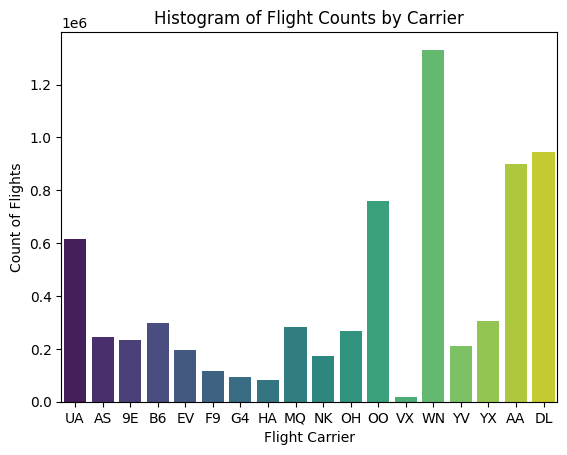

In [ ]:
sns.barplot(x= features.index, y='COUNT(flights)', data=features, palette='viridis')
plt.xlabel('Flight Carrier')
plt.ylabel('Count of Flights')
plt.title('Histogram of Flight Counts by Carrier')
plt.show()

Visualizing the relationship between the maximum departure delay and the maximum arrival delay for each data point. So that we can understand if there is any correlation or pattern between MAX(flights.DEP_DELAY) and MAX(flights.ARR_DELAY).

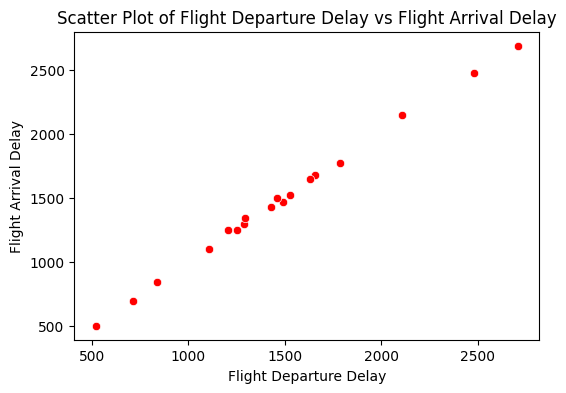

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='MAX(flights.DEP_DELAY)', y='MAX(flights.ARR_DELAY)', data=features, color='red')
plt.xlabel('Flight Departure Delay')
plt.ylabel('Flight Arrival Delay')
plt.title('Scatter Plot of Flight Departure Delay vs Flight Arrival Delay')
plt.show()

Generating a bar plot to visualize the total distance covered by flights for each flight carrier. This can provide insights into the comparative distances traveled by different carriers, allowing for a quick comparison of their overall flight distances.

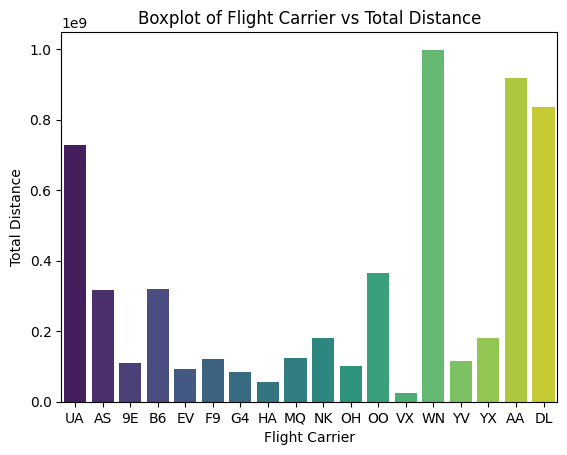

In [ ]:
sns.barplot(x= features.index, y='SUM(flights.DISTANCE)', data=features, palette='viridis')
plt.xlabel('Flight Carrier')
plt.ylabel('Total Distance')
plt.title('Boxplot of Flight Carrier vs Total Distance')
plt.show()

Creating a bar plot to visualize the average air time for flights operated by different carriers. This visualization allows for a quick comparison of the carriers based on the average duration of their flights.

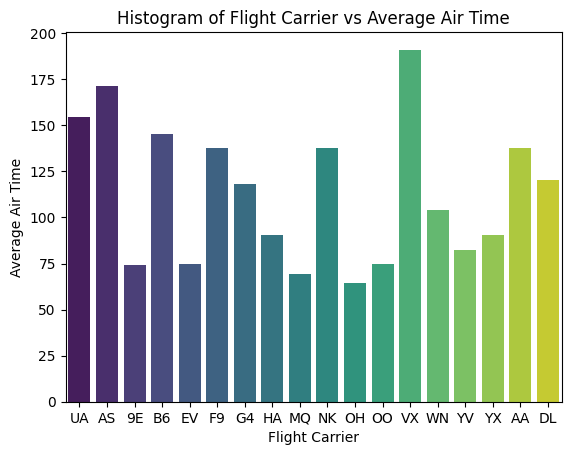

In [ ]:
sns.barplot(x= features.index, y='MEAN(flights.AIR_TIME)', data=features, palette='viridis')
plt.xlabel('Flight Carrier')
plt.ylabel('Average Air Time')
plt.title('Histogram of Flight Carrier vs Average Air Time')
plt.show()

Generating a heatmap that visually represents the correlation matrix of the selected features in selected_columns2_df. This visualization helps in understanding the relationships between "DISTANCE" , "1/DISTANCE", "DISTANCE*Abs(ARR_DELAY)" and "ARR_DELAY/DISTANCE", especially the strength and direction of their correlations. The cooler or warmer colors and the numerical annotations provide insights into how strongly and in what direction these features are correlated with each other

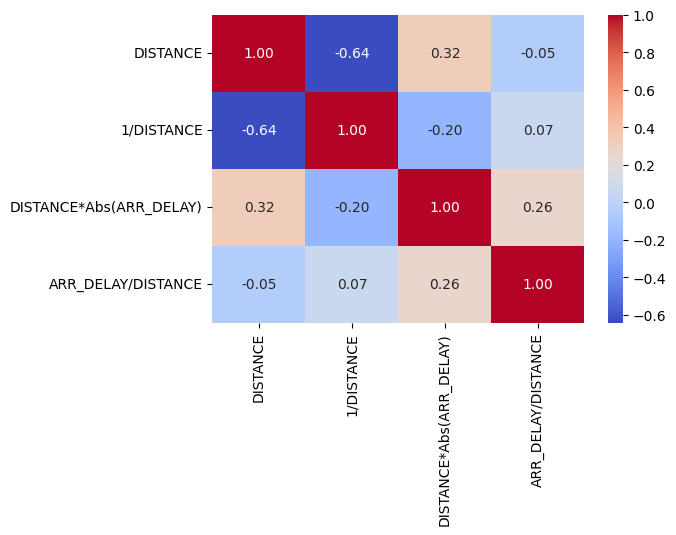

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = selected_columns2_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Visualizing the relationship between the 'DISTANCE' and '1/DISTANCE' features using a scatter plot.

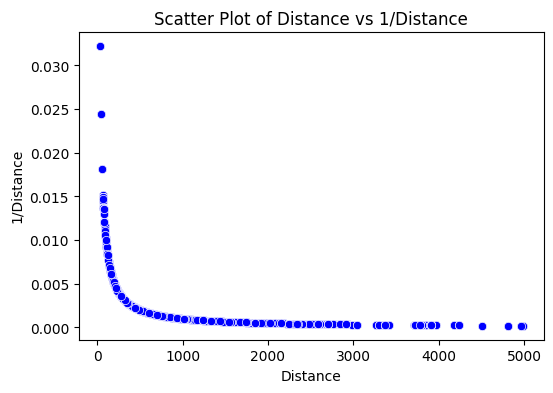

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='DISTANCE', y='1/DISTANCE', data=selected_columns2_df, color='blue')
plt.xlabel('Distance')
plt.ylabel('1/Distance')
plt.title('Scatter Plot of Distance vs 1/Distance')
plt.show()

Visualizing the relationship between the '1/DISTANCE' and 'ARR_DELAY*DISTANCE' features using a scatter plot.

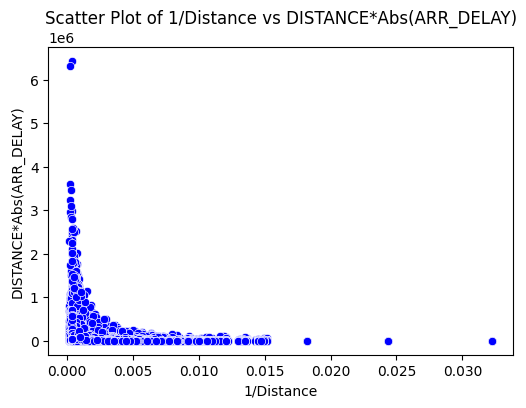

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='1/DISTANCE', y='DISTANCE*Abs(ARR_DELAY)', data=selected_columns2_df, color='blue')
plt.xlabel('1/Distance')
plt.ylabel('DISTANCE*Abs(ARR_DELAY)')
plt.title('Scatter Plot of 1/Distance vs DISTANCE*Abs(ARR_DELAY)')
plt.show()

Visualizing the relationship between the 'DISTANCE* Abs(ARR_DELAY)' and 'ARR_DELAY/DISTANCE' features using a scatter plot. This type of plot can reveal patterns, trends, or correlations between these two variables.

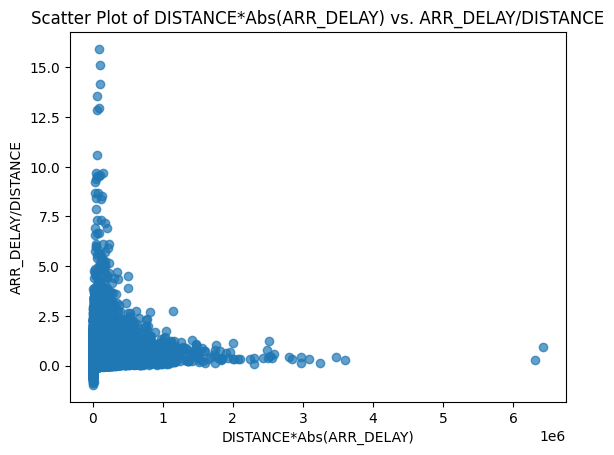

In [ ]:
plt.scatter(selected_columns2_df['DISTANCE*Abs(ARR_DELAY)'], selected_columns2_df['ARR_DELAY/DISTANCE'], alpha=0.7)
plt.xlabel('DISTANCE*Abs(ARR_DELAY)')
plt.ylabel('ARR_DELAY/DISTANCE')
plt.title('Scatter Plot of DISTANCE*Abs(ARR_DELAY) vs. ARR_DELAY/DISTANCE')
plt.show()

Providing a numerical measure of the linear correlation between the 'DISTANCEAbs(ARR_DELAY)' and 'ARR_DELAYAbs(ARR_DELAY)' features.

In [ ]:
correlation_distance_abs_delay = selected_columns2_df['DISTANCE*Abs(ARR_DELAY)'].corr(selected_columns2_df['ARR_DELAY/DISTANCE'])
print(f"Correlation: {correlation_distance_abs_delay}")


Correlation: 0.26200476254529376


##Step 7 - Conclusion

###Summary of findings:

* The flight carrier labeled WN boasts the highest count of flights, reaching 1,331,609 in total. In contrast, the VN flight carrier has the lowest count of flights, with a total of 17,153.

* A distinct linear relationship is evident between flight departure delay and flight arrival delay, indicating a clear correlation between these two features.

* WN, the flight carrier, stands out with the highest total distance covered among all carriers, accumulating a staggering 998,441,965 in total. In contrast, the VX flight carrier has the lowest total distance covered, with a distance of 25,130,861.0.

* VX flight carrier leads the pack with the longest average air time per flight, reaching an impressive 191.06 minutes. In opposite, the OH flight carrier has the shortest average air time per flight, with a duration of 64.56 minutes.

* The 'DISTANCE' and '1/DISTANCE' features exhibit an inverse relationship, showcasing a clear pattern of correlation.

* Similarly, the '1/DISTANCE' and 'DISTANCE*Abs(ARR_DELAY)' features also demonstrate an inverse relationship, revealing a distinctive correlation between the two variables.

* The features 'DISTANCEAbs(ARR_DELAY)' and 'ARR_DELAY/DISTANCE' exhibit an inverse relationship pattern, and the correlation between the two variables is not highly robust due to the presence of numerous outliers.

* The numerical measure of the linear correlation between 'DISTANCEAbs(ARR_DELAY)' and 'ARR_DELAY/DISTANCE' features is  0.262005, indicating a low positive linear relationship between the two variables.


### Feature engineering steps with automated tools:
#### 1. Featuretools
Creating an empty EntitySet with the identifier 'flights'
* es = ft.EntitySet(id = 'flights')

Creating a new DataFrame (op_carrier) containing unique values, we set "OP_CARRIER" column from the original dataframe as unique value. This is because without a unique value the Featuretools could not perform its DFS.
* op_carrier = pd.DataFrame(df.OP_CARRIER.unique(), columns = ["op_carrier"])

Creating an entity from the df dataframe and add it into the empty EntitySet. This step is to make a foundation for the DFS by Featuretools that we will be performing later.
* es = es.add_dataframe( dataframe = op_carrier, dataframe_name = "op_carrier")

Establishing a relationship between the "op_carrier" entity and the "flights" entity in the EntitySet. This step is very important because without a relationship the Featuretools cannot perform Deep Feature Synthesis.
* es.add_relationship("op_carrier", "op_carrier", "flights", "OP_CARRIER")

Performing the "Deep Feature Synthesis" function by using Featuretools on the entity set that we had created. In this step, we do not specify any primitives while performing the DFS therefore it could generate as much features as possible.
* features, feature_names = ft.dfs(entityset=es, target_dataframe_name='op_carrier',  max_depth = 1)

By performing the tasks above, we had successfully applying Featuretools Automated Feature Engineering on our dataset as there is 101 new features generated. The main reason that we choose Featuretools as the Automated Feature Engineering Tool is because it is user-friendly and provide very effective results.
<br><br>
#### 2. AutoFeat
Setting up the target variable = "ARR_TIME" for a regression task and create an instance of AutoFeatRegressor to automate the process of feature engineering. This step is to improve the predictive performance of a regression model.
* target_variable = 'ARR_TIME'
* afreg = AutoFeatRegressor()

Setting up the list of selected columns ('DISTANCE' and 'ARR_DELAY') for the regression task. In this step, we select the columns from the dataframe that we want to perform a regression model with the target_variable. We only select 2 effective columns because too many columns would cause the RAM to exceeds its limit and crashed.
* selected_columns = ['DISTANCE', 'ARR_DELAY']

Creating a subset from original dataframe that only contain the selected columns and target variable. We only use 10% of randomly sample of data in this step because, a larger data would cause the RAM to exceeds it limits and we could not perform the regression model successfully.
* df_train = df[selected_columns + [target_variable]].sample(frac = 0.1)

Separating the dataset into two parts, features(X_train) and target_variable(y_train). We do this in order to train a model on historical data and later evaluate its performance on new data.
* X_train = df_train.drop(target_variable, axis=1)
* y_train = df_train[target_variable]

Fitting the AutoFeatRegressor (afreg) to the training features (X_train) and target variable (y_train) using the fit_transform method to enhance the feature set for training a regression model. The purpose is to let the algorithm automatically create and select features that may better represent the underlying patterns in the data.
* X_train_transformed = afreg.fit_transform(X_train, y_train)

By performing the tasks above, we had successfully applying AutoFeat Automated Feature Engineering on the 3 columns from our dataset and there is 12 new features generated. The main reason that we choose AutoFeat as the Automated Feature Engineering Tool is due to its performance of machine learning models by automatically generating relevant and informative features.
